<a href="https://colab.research.google.com/github/monishkumaar3/Machine-learning-projects/blob/main/UNET_brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing install

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = os.path.join("/content/drive/MyDrive/BT/Image" )
mask_path = os.path.join("/content/drive/MyDrive/BT/Mask")

In [ ]:
images = os.listdir(image_path)
mask = os.listdir(mask_path)

In [ ]:
print(images)
print(mask)

['I (36).png', 'I (45).png', 'I (46).png', 'I (47).png', 'I (37).png', 'I (5).png', 'I (9).png', 'I (2).png', 'I (32).png', 'I (28).png', 'I (34).png', 'I (15).png', 'I (11).png', 'I (16).png', 'I (19).png', 'I (21).png', 'I (23).png', 'I (18).png', 'I (20).png', 'I (33).png', 'I (13).png', 'I (14).png', 'I (22).png', 'I (39).png', 'I (38).png', 'I (40).png', 'I (3).png', 'I (31).png', 'I (12).png', 'I (17).png', 'I (4).png', 'I (30).png', 'I (42).png', 'I (25).png', 'I (29).png', 'I (41).png', 'I (27).png', 'I (7).png', 'I (24).png', 'I (1).png', 'I (6).png', 'I (26).png', 'I (8).png', 'I (10).png', 'I (44).png', 'I (43).png', 'I (35).png']
['M (47).png', 'M (45).png', 'M (46).png', 'M (37).png', 'M (36).png', 'M (16).png', 'M (1).png', 'M (19).png', 'M (12).png', 'M (20).png', 'M (42).png', 'M (40).png', 'M (27).png', 'M (7).png', 'M (5).png', 'M (26).png', 'M (21).png', 'M (41).png', 'M (39).png', 'M (10).png', 'M (14).png', 'M (22).png', 'M (23).png', 'M (17).png', 'M (9).png', 'M 

In [ ]:
print(len(images))

47


In [ ]:
# Here there are total 30 images, please mention number of images for testing and training
no_of_images_for_training=40
no_of_images_for_testing=7

In [ ]:
def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    t=0
    if flag == "test":
        for i in range(47):
            n=i+1
            t1="I"+" "+"("+str(n)+")"+".png"
            t2="M"+" "+"("+str(n)+")"+".png"
            im = cv2.resize(cv2.imread(os.path.join(image_path,t1)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,t2)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)
            t+=1
            if t==5:
              break


        return im_array,mask_array

    if flag == "train":
        for i in range(47):
            n=i+1
            t1="I"+" "+"("+str(n)+")"+".png"
            t2="M"+" "+"("+str(n)+")"+".png"
            im = cv2.resize(cv2.imread(os.path.join(image_path,t1)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,t2)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

In [ ]:
dim=256*2
X_train,y_train =getData(dim,flag="train")

In [ ]:
X_test, y_test = getData(dim)

In [ ]:
print(len(X_train),len(y_train))

47 47


In [ ]:
print(len(X_test),len(y_test))

5 5


In [ ]:
def plotMask(X,y):
    num_samples = min(10, len(X), len(y))  # Determine the number of samples to display, up to 10
    sample = []

    for i in range(num_samples):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)


    for i in range(0, min(6, num_samples), 3):  # Adjust the loop range based on available samples

        plt.figure(figsize=(25,10))

        plt.subplot(2,3,1+i)
        plt.imshow(sample[i], cmap='jet')

        if i + 1 < num_samples:
            plt.subplot(2,3,2+i)
            plt.imshow(sample[i+1], cmap='viridis')

        if i + 2 < num_samples:
            plt.subplot(2,3,3+i)
            plt.imshow(sample[i+2], cmap='viridis')

        plt.show()

training set


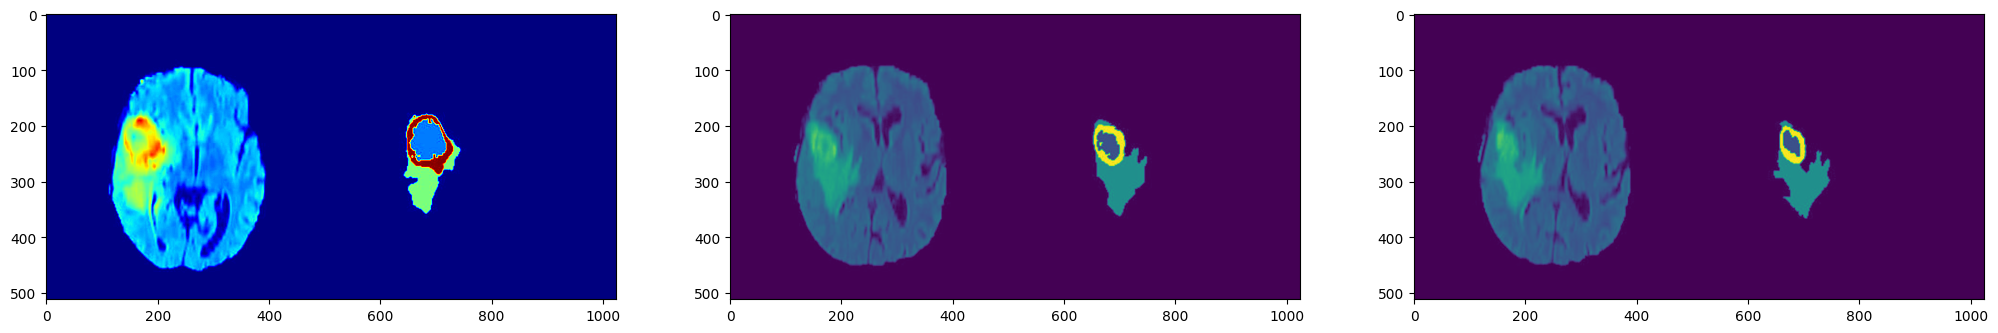

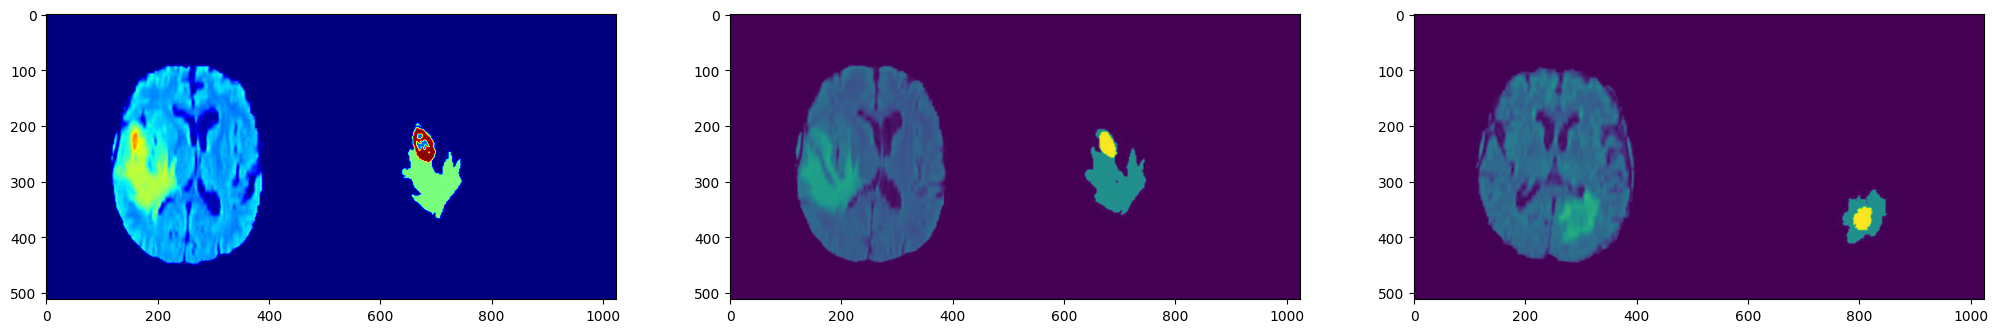

testing set


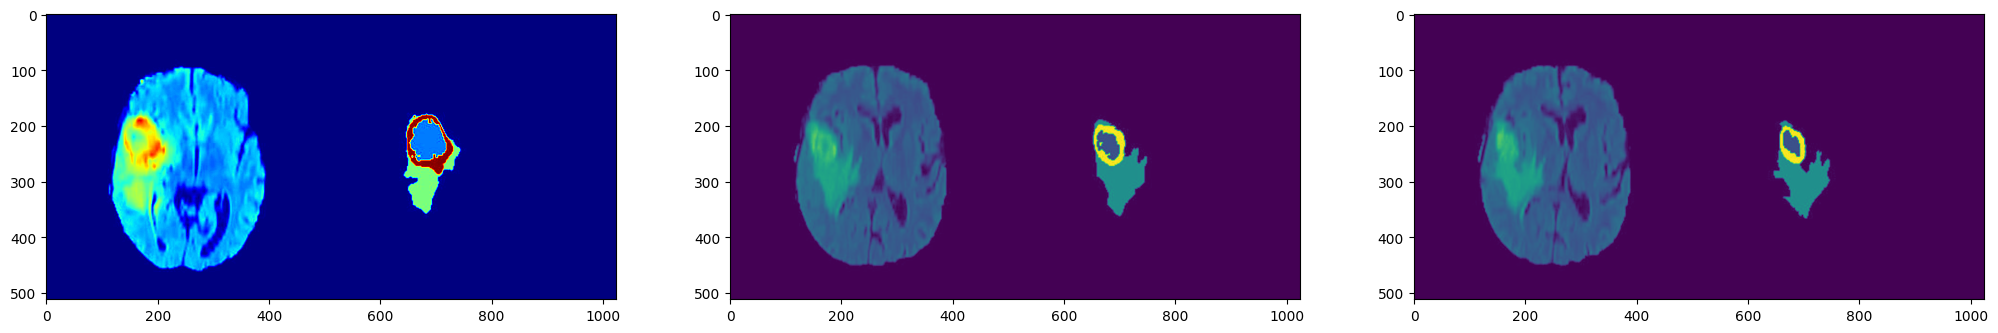

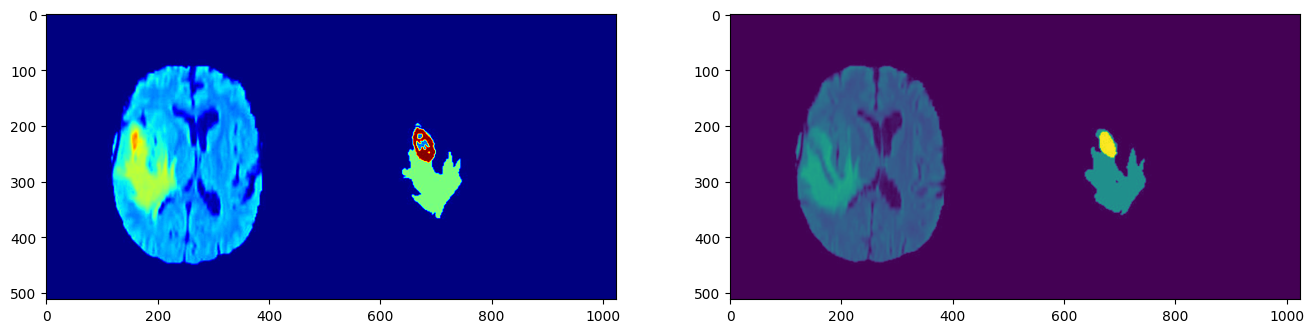

In [ ]:
print("training set")
plotMask(X_train,y_train)
print("testing set")
plotMask(X_test,y_test)

In [ ]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train,X_test),axis=0)
mask  = np.concatenate((y_train,y_test),axis=0)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(224,224,1)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
from tensorflow.keras.optimizers import Adam
model = unet(input_size=(224,224,1))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.10/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-5)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=15) # probably needs to be more patient
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
from sklearn.model_selection import train_test_split

# Resize images to match the model input size
import cv2
train_vol_resized = np.array([cv2.resize(img, (224, 224)) for img in train_vol])
test_vol_resized = np.array([cv2.resize(img, (224, 224)) for img in test_vol])
train_seg_resized = np.array([cv2.resize(img, (224, 224)) for img in train_seg])
test_seg_resized = np.array([cv2.resize(img, (224, 224)) for img in test_seg])

# Reshape the resized data
train_vol_resized = train_vol_resized.reshape(train_vol_resized.shape[0], 224, 224, 1)
test_vol_resized = test_vol_resized.reshape(test_vol_resized.shape[0], 224, 224, 1)
train_seg_resized = train_seg_resized.reshape(train_seg_resized.shape[0], 224, 224, 1)
test_seg_resized = test_seg_resized.reshape(test_seg_resized.shape[0], 224, 224, 1)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=[dice_coef_loss],
           metrics = [dice_coef, 'binary_accuracy'])

loss_history = model.fit(x = train_vol_resized, # Use resized data
                       y = train_seg_resized, # Use resized data
                         batch_size =8,
                  epochs = 10,
                  validation_data =(test_vol_resized,test_seg_resized) , # Use resized data
                  callbacks=callbacks_list)

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: -0.0400 - dice_coef: 0.0400 - binary_accuracy: 0.0156 
Epoch 1: val_loss improved from inf to -0.03801, saving model to cxr_reg_weights.best.hdf5
4/4 [==============================] - 64s 15s/step - loss: -0.0400 - dice_coef: 0.0400 - binary_accuracy: 0.0156 - val_loss: -0.0380 - val_dice_coef: 0.0322 - val_binary_accuracy: 0.0146 - lr: 1.0000e-04
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: -0.0404 - dice_coef: 0.0404 - binary_accuracy: 0.0156 
Epoch 2: val_loss improved from -0.03801 to -0.03841, saving model to cxr_reg_weights.best.hdf5
4/4 [==============================] - 69s 18s/step - loss: -0.0404 - dice_coef: 0.0404 - binary_accuracy: 0.0156 - val_loss: -0.0384 - val_dice_coef: 0.0326 - val_binary_accuracy: 0.0146 - lr: 1.0000e-04
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: -0.0408 - dice_coef: 0.0408 - binary_accuracy: 0.0156 
Epoch 3: val_loss improved from -0.03841

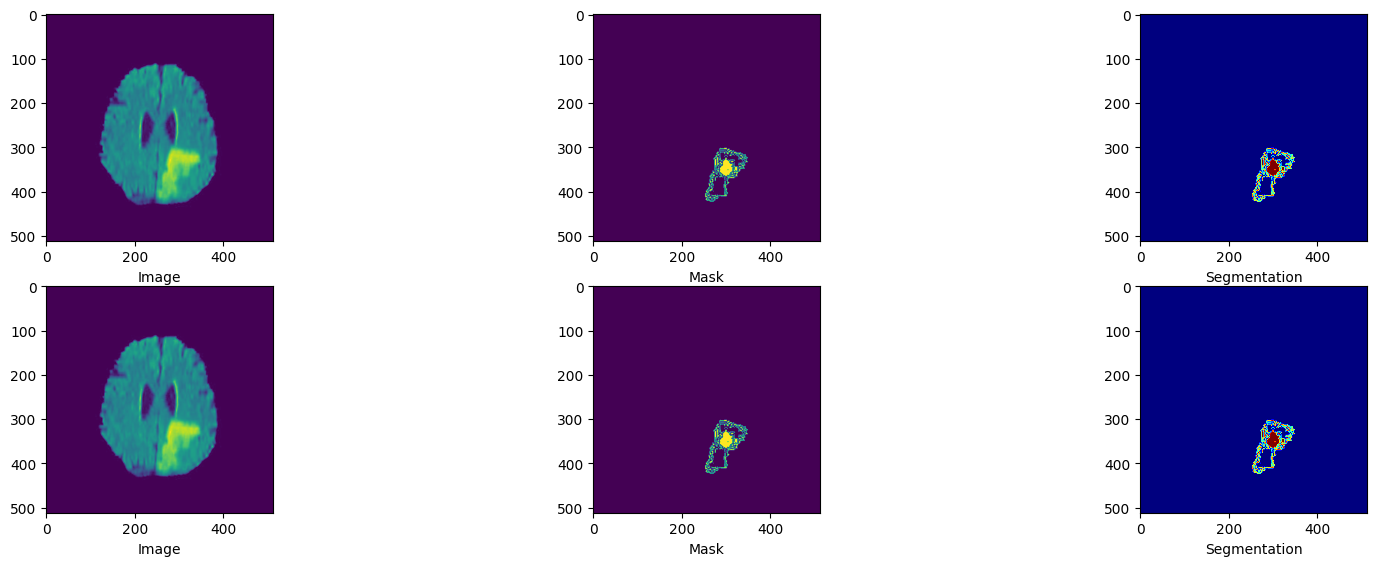

In [ ]:
# Resize images in validation_vol to match the model input size
validation_vol_resized = np.array([cv2.resize(img, (224, 224)) for img in validation_vol])
validation_vol_resized = validation_vol_resized.reshape(validation_vol_resized.shape[0], 224, 224, 1)

# Now predict using the resized validation data
preds = model.predict(validation_vol_resized)

plt.figure(figsize=(20,10))

for i in range(0,4,3):
    plt.subplot(3,3,i+1)

    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]), cmap='viridis')
    plt.xlabel("Image")


    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]), cmap='viridis')
    plt.xlabel("Mask")

    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]), cmap='jet')
    plt.xlabel("Segmentation")

plt.savefig("tumor_output.png")



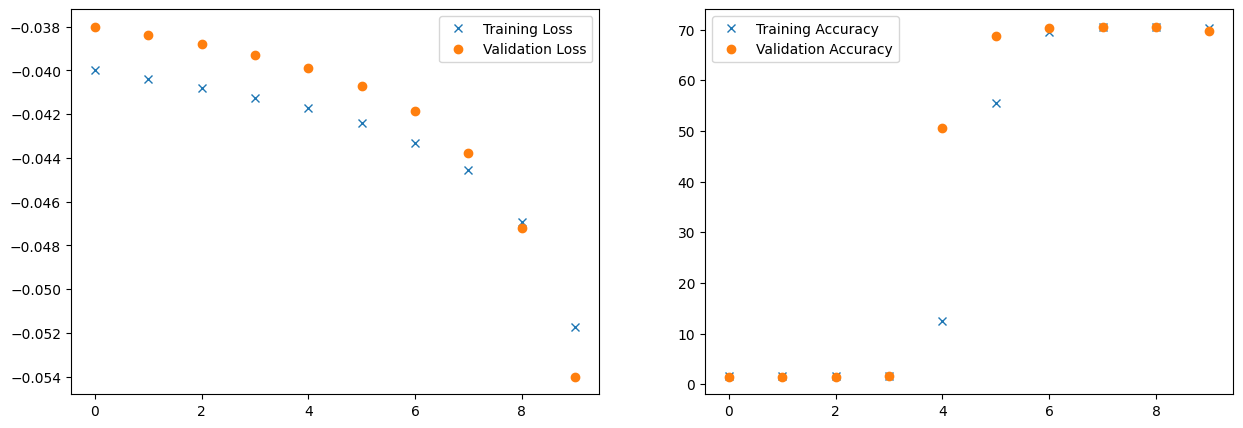

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.plot(loss_history.history['loss'], 'x', label = 'Training Loss', linewidth=1)
ax1.plot(loss_history.history['val_loss'], 'o', label = 'Validation Loss', linewidth=1)
ax1.legend()
#plt.xlabel("Epoch")

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), 'x', label = 'Training Accuracy', linewidth=1)
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), 'o', label = 'Validation Accuracy', linewidth=1)
ax2.legend()
#plt.xlabel("Epoch")
plt.savefig("validation.png")

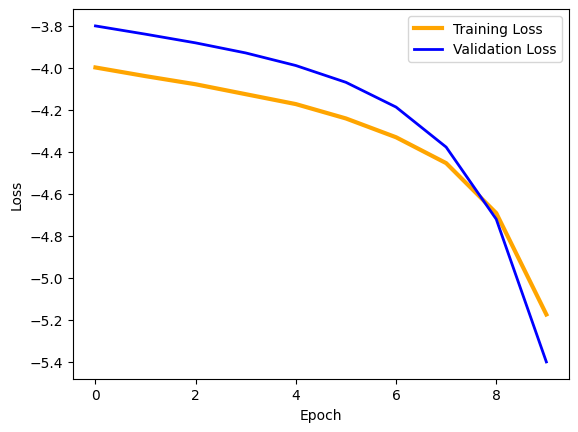

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt # Import pyplot

plt.plot(100*np.array(loss_history.history['loss']), 'orange', label = 'Training Loss', linewidth=3)
plt.plot(100*np.array(loss_history.history['val_loss']),'b',label = 'Validation Loss', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("ACC.tiff") # Remove the invalid 'dmin' argument

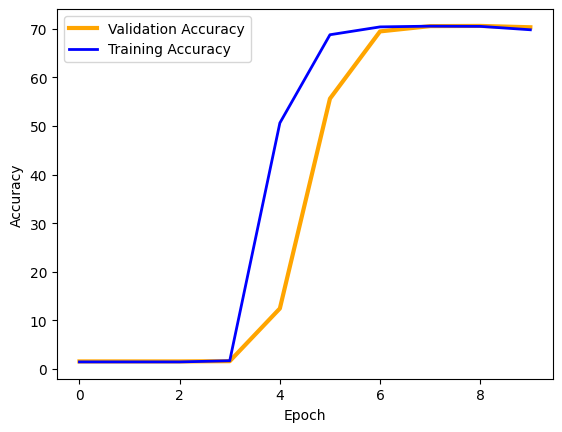

<Figure size 640x480 with 0 Axes>

NameError: name 'pyplot' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.plot(100*np.array(loss_history.history['binary_accuracy']),  'orange', label = 'Validation Accuracy', linewidth=3)
plt.plot(100*np.array(loss_history.history['val_binary_accuracy']), 'b', label = 'Training Accuracy', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
pyplot.savefig("ACC.tiff",dmin=700)


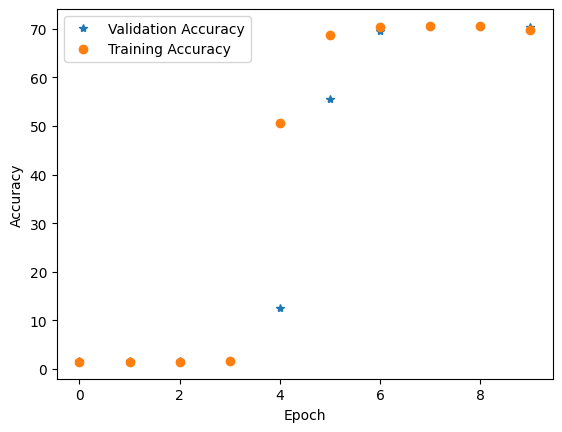

<Figure size 640x480 with 0 Axes>

NameError: name 'pyplot' is not defined

In [ ]:
plt.plot(100*np.array(loss_history.history['binary_accuracy']),  '*', label = 'Validation Accuracy', linewidth=1)
plt.plot(100*np.array(loss_history.history['val_binary_accuracy']), 'o', label = 'Training Accuracy', linewidth=1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
pyplot.savefig("ACC.tiff",dmin=700)


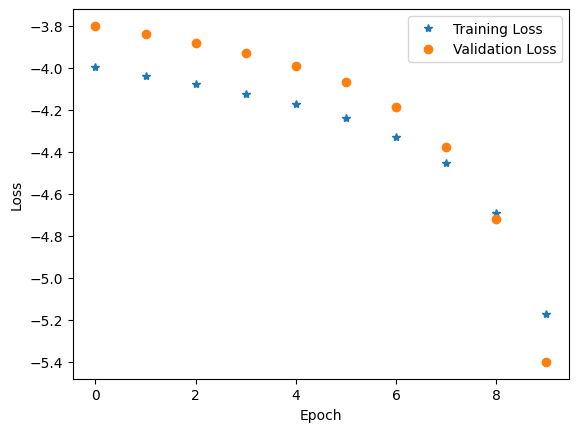

<Figure size 640x480 with 0 Axes>

NameError: name 'pyplot' is not defined

In [ ]:
plt.plot(100*np.array(loss_history.history['loss']), '*', label = 'Training Loss', linewidth=1)
plt.plot(100*np.array(loss_history.history['val_loss']),'o',label = 'Validation Loss', linewidth=1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
pyplot.savefig("ACC.tiff",dmin=700)

In [ ]:
##### Checking and extracting the indexes of "Convolutional Layers"
t=list(model.layers)
conv_index=[]
for i in range(len(t)):
  layer=t[i]
  if 'conv' in layer.name:
    conv_index.append(i)

print("Indexes of Convolutional Layers are ",conv_index)

Indexes of Convolutional Layers are  [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31]


In [ ]:
##### Checking layer name and output shapes
for i in conv_index:
  layer=model.layers[i]
  print("layer name is :{}            output Shape is : {}".format(layer.name,layer.output.shape))

layer name is :conv2d            output Shape is : (None, 224, 224, 32)
layer name is :conv2d_1            output Shape is : (None, 224, 224, 32)
layer name is :conv2d_2            output Shape is : (None, 112, 112, 64)
layer name is :conv2d_3            output Shape is : (None, 112, 112, 64)
layer name is :conv2d_4            output Shape is : (None, 56, 56, 128)
layer name is :conv2d_5            output Shape is : (None, 56, 56, 128)
layer name is :conv2d_6            output Shape is : (None, 28, 28, 256)
layer name is :conv2d_7            output Shape is : (None, 28, 28, 256)
layer name is :conv2d_8            output Shape is : (None, 14, 14, 512)
layer name is :conv2d_9            output Shape is : (None, 14, 14, 512)
layer name is :conv2d_transpose            output Shape is : (None, 28, 28, 256)
layer name is :conv2d_10            output Shape is : (None, 28, 28, 256)
layer name is :conv2d_11            output Shape is : (None, 28, 28, 256)
layer name is :conv2d_transpose_1      

In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[10].output)
M_conv_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                           